## Exercise 35

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
titanic_data=pd.read_csv(r"train.csv")

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
titanic_data.isnull().sum()   ### Check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_data["Sex"] = titanic_data["Sex"].astype('category').cat.codes
titanic_data["Embarked"] = titanic_data["Embarked"].astype('category').cat.codes
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked          int8
dtype: object

In [5]:
#### Missing Value imputation
mean_value=titanic_data['Age'].mean()
titanic_data['Age']=titanic_data['Age'].fillna(mean_value)

titanic_data[['Cabin']]=np.where(titanic_data[['Cabin']].isnull(), 0, 1)


In [6]:
target = 'Survived'
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y=titanic_data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.50,random_state=123, stratify=y)

In [7]:
clf_svm=svm.SVC(kernel='linear', C=1)


In [8]:
clf_svm

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
clf_svm.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
clf_svm.score(X_test, y_test)

0.7668161434977578

## Exercise 36

In [11]:
import graphviz 
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\yuvbhard\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [12]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

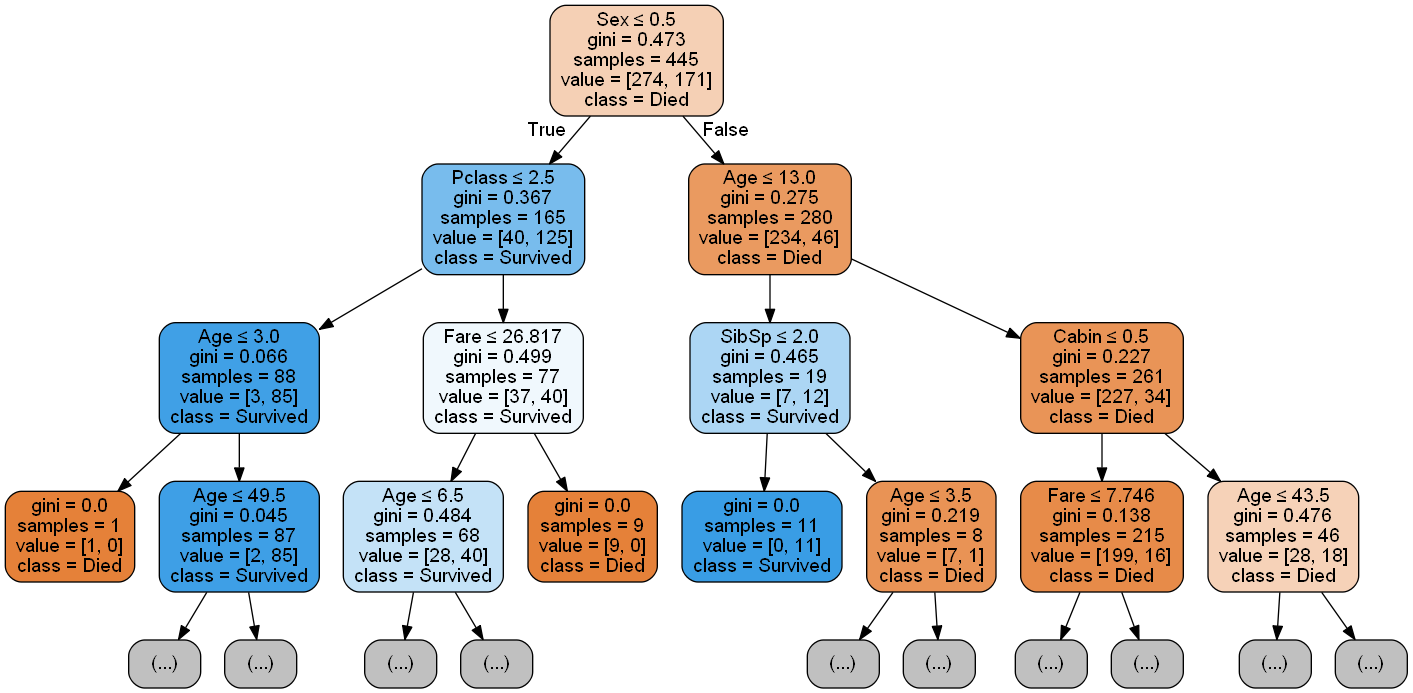

In [13]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Died','Survived'],max_depth = 3,
                special_characters=True,feature_names=X.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
clf_tree.score(X_test, y_test)

0.7713004484304933

## Exercise 37

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)



In [17]:
clf_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
clf_random.score(X_test, y_test)

0.7914798206278026